In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df1 = pd.read_csv('/content/gdrive/My Drive/Capstone/US_counties_COVID19_health_weather_data - Abridged_V1.csv')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680879 entries, 0 to 680878
Data columns (total 45 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   date                                         680879 non-null  object 
 1   county                                       680879 non-null  object 
 2   state                                        680879 non-null  object 
 3   cases                                        680879 non-null  int64  
 4   deaths                                       680879 non-null  int64  
 5   total_population                             665900 non-null  float64
 6   population_density_per_sqmi                  665900 non-null  float64
 7   percent_fair_or_poor_health                  665900 non-null  float64
 8   average_number_of_physically_unhealthy_days  665900 non-null  float64
 9   percent_smokers                              665900 non-nul

In [ ]:
from datetime import datetime

In [ ]:
format_str = '%d-%m-%y' # The format

In [ ]:
#datetime_obj = datetime.strptime(p, format_str)
#print(datetime_obj.date())

In [ ]:
#datetime_obj1 = datetime.strptime(q, format_str)
#print(datetime_obj1.date())

2020-01-22


In [ ]:
#datetime_obj1-datetime_obj

datetime.timedelta(1)

In [ ]:
date_df = pd.DataFrame(df1['date'])

In [ ]:
#df1['newdate'] = datetime.strptime(df1['date'], format_str)
df1['newdate'] =date_df.applymap(lambda x: datetime.strptime(x, format_str))

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680879 entries, 0 to 680878
Data columns (total 46 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   date                                         680879 non-null  object        
 1   county                                       680879 non-null  object        
 2   state                                        680879 non-null  object        
 3   cases                                        680879 non-null  int64         
 4   deaths                                       680879 non-null  int64         
 5   total_population                             665900 non-null  float64       
 6   population_density_per_sqmi                  665900 non-null  float64       
 7   percent_fair_or_poor_health                  665900 non-null  float64       
 8   average_number_of_physically_unhealthy_days  665900 non-null  fl

In [ ]:
df1.head()

,date,county,state,cases,deaths,total_population,population_density_per_sqmi,percent_fair_or_poor_health,average_number_of_physically_unhealthy_days,percent_smokers,percent_adults_with_obesity,percent_physically_inactive,num_uninsured,num_primary_care_physicians,percent_vaccinated,overcrowding,life_expectancy,percent_adults_with_diabetes,num_hiv_cases,median_household_income,num_black,num_american_indian_alaska_native,num_asian,num_native_hawaiian_other_pacific_islander,num_hispanic,num_non_hispanic_white,percent_female,num_rural,num_below_poverty,num_unemployed_CDC,per_capita_income,num_age_65_and_older,num_age_17_and_younger,num_disabled,percent_below_poverty,km_to_closest_station,ELEV_M,mean_temp,dewpoint,wind_speed,precipitation,fog,rain,snow,hail,newdate
0,21-01-20,Snohomish,Washington,1,0,758649.0,363.586159,14.403971,3.700802,12.962309,28.9,17.8,43121.0,421.0,49.0,2.948407,80.374691,8.2,1017.0,87096.0,27554.0,12877.0,94831.0,5618.0,85109.0,561043.0,49.827402,77179.0,69695.0,25009.0,33883.0,91641.0,175821.0,89280.0,9.3,36.572880,41.8,44.1,40.3,8.3,0.00,0.0,1.0,0.0,0.0,2020-01-21
1,22-01-20,Snohomish,Washington,1,0,758649.0,363.586159,14.403971,3.700802,12.962309,28.9,17.8,43121.0,421.0,49.0,2.948407,80.374691,8.2,1017.0,87096.0,27554.0,12877.0,94831.0,5618.0,85109.0,561043.0,49.827402,77179.0,69695.0,25009.0,33883.0,91641.0,175821.0,89280.0,9.3,36.572880,41.8,44.8,40.3,13.2,0.29,0.0,1.0,0.0,0.0,2020-01-22
2,23-01-20,Snohomish,Washington,1,0,758649.0,363.586159,14.403971,3.700802,12.962309,28.9,17.8,43121.0,421.0,49.0,2.948407,80.374691,8.2,1017.0,87096.0,27554.0,12877.0,94831.0,5618.0,85109.0,561043.0,49.827402,77179.0,69695.0,25009.0,33883.0,91641.0,175821.0,89280.0,9.3,36.572880,41.8,49.9,47.3,12.0,0.54,0.0,1.0,0.0,0.0,2020-01-23
3,24-01-20,Cook,Illinois,1,0,5227575.0,5531.878539,17.140851,3.471088,13.776183,28.0,21.0,437634.0,4863.0,45.0,3.627783,79.415730,9.5,25780.0,63347.0,1193642.0,38253.0,408151.0,3873.0,1323017.0,2180074.0,51.431630,2353.0,856682.0,266397.0,32179.0,677659.0,1186398.0,536288.0,16.7,8.063384,186.5,36.1,34.7,4.8,0.16,1.0,1.0,1.0,0.0,2020-01-24
4,24-01-20,Snohomish,Washington,1,0,758649.0,363.586159,14.403971,3.700802,12.962309,28.9,17.8,43121.0,421.0,49.0,2.948407,80.374691,8.2,1017.0,87096.0,27554.0,12877.0,94831.0,5618.0,85109.0,561043.0,49.827402,77179.0,69695.0,25009.0,33883.0,91641.0,175821.0,89280.0,9.3,36.572880,41.8,51.5,46.6,13.0,0.32,0.0,1.0,0.0,0.0,2020-01-24


In [ ]:
# creating subset of df1 to experiement with groupby
df2 = pd.DataFrame(df1)

In [ ]:
df2.head()

,date,county,state,cases,deaths,total_population,population_density_per_sqmi,percent_fair_or_poor_health,average_number_of_physically_unhealthy_days,percent_smokers,percent_adults_with_obesity,percent_physically_inactive,num_uninsured,num_primary_care_physicians,percent_vaccinated,overcrowding,life_expectancy,percent_adults_with_diabetes,num_hiv_cases,median_household_income,num_black,num_american_indian_alaska_native,num_asian,num_native_hawaiian_other_pacific_islander,num_hispanic,num_non_hispanic_white,percent_female,num_rural,num_below_poverty,num_unemployed_CDC,per_capita_income,num_age_65_and_older,num_age_17_and_younger,num_disabled,percent_below_poverty,km_to_closest_station,ELEV_M,mean_temp,dewpoint,wind_speed,precipitation,fog,rain,snow,hail,newdate
0,21-01-20,Snohomish,Washington,1,0,758649.0,363.586159,14.403971,3.700802,12.962309,28.9,17.8,43121.0,421.0,49.0,2.948407,80.374691,8.2,1017.0,87096.0,27554.0,12877.0,94831.0,5618.0,85109.0,561043.0,49.827402,77179.0,69695.0,25009.0,33883.0,91641.0,175821.0,89280.0,9.3,36.572880,41.8,44.1,40.3,8.3,0.00,0.0,1.0,0.0,0.0,2020-01-21
1,22-01-20,Snohomish,Washington,1,0,758649.0,363.586159,14.403971,3.700802,12.962309,28.9,17.8,43121.0,421.0,49.0,2.948407,80.374691,8.2,1017.0,87096.0,27554.0,12877.0,94831.0,5618.0,85109.0,561043.0,49.827402,77179.0,69695.0,25009.0,33883.0,91641.0,175821.0,89280.0,9.3,36.572880,41.8,44.8,40.3,13.2,0.29,0.0,1.0,0.0,0.0,2020-01-22
2,23-01-20,Snohomish,Washington,1,0,758649.0,363.586159,14.403971,3.700802,12.962309,28.9,17.8,43121.0,421.0,49.0,2.948407,80.374691,8.2,1017.0,87096.0,27554.0,12877.0,94831.0,5618.0,85109.0,561043.0,49.827402,77179.0,69695.0,25009.0,33883.0,91641.0,175821.0,89280.0,9.3,36.572880,41.8,49.9,47.3,12.0,0.54,0.0,1.0,0.0,0.0,2020-01-23
3,24-01-20,Cook,Illinois,1,0,5227575.0,5531.878539,17.140851,3.471088,13.776183,28.0,21.0,437634.0,4863.0,45.0,3.627783,79.415730,9.5,25780.0,63347.0,1193642.0,38253.0,408151.0,3873.0,1323017.0,2180074.0,51.431630,2353.0,856682.0,266397.0,32179.0,677659.0,1186398.0,536288.0,16.7,8.063384,186.5,36.1,34.7,4.8,0.16,1.0,1.0,1.0,0.0,2020-01-24
4,24-01-20,Snohomish,Washington,1,0,758649.0,363.586159,14.403971,3.700802,12.962309,28.9,17.8,43121.0,421.0,49.0,2.948407,80.374691,8.2,1017.0,87096.0,27554.0,12877.0,94831.0,5618.0,85109.0,561043.0,49.827402,77179.0,69695.0,25009.0,33883.0,91641.0,175821.0,89280.0,9.3,36.572880,41.8,51.5,46.6,13.0,0.32,0.0,1.0,0.0,0.0,2020-01-24


In [ ]:
df2.drop('date',axis = 1,inplace=True)

In [ ]:
li = list(['newdate','county','state', 'cases', 'deaths', 'total_population',
          'population_density_per_sqmi', 'percent_fair_or_poor_health',
          'average_number_of_physically_unhealthy_days', 'percent_smokers',
          'percent_adults_with_obesity', 'percent_physically_inactive',
          'num_uninsured', 'num_primary_care_physicians', 'percent_vaccinated',
          'overcrowding', 'life_expectancy', 'percent_adults_with_diabetes',
          'num_hiv_cases', 'median_household_income', 'num_black',
          'num_american_indian_alaska_native', 'num_asian',
          'num_native_hawaiian_other_pacific_islander', 'num_hispanic',
          'num_non_hispanic_white', 'percent_female', 'num_rural',
          'num_below_poverty', 'num_unemployed_CDC', 'per_capita_income',
          'num_age_65_and_older', 'num_age_17_and_younger', 'num_disabled',
          'percent_below_poverty', 'km_to_closest_station', 'ELEV_M', 
          'mean_temp','dewpoint', 'wind_speed', 'precipitation', 'fog',
          'rain', 'snow','hail'])

In [ ]:
df2=df2[li]

In [ ]:
df2.head()

,newdate,county,state,cases,deaths,total_population,population_density_per_sqmi,percent_fair_or_poor_health,average_number_of_physically_unhealthy_days,percent_smokers,percent_adults_with_obesity,percent_physically_inactive,num_uninsured,num_primary_care_physicians,percent_vaccinated,overcrowding,life_expectancy,percent_adults_with_diabetes,num_hiv_cases,median_household_income,num_black,num_american_indian_alaska_native,num_asian,num_native_hawaiian_other_pacific_islander,num_hispanic,num_non_hispanic_white,percent_female,num_rural,num_below_poverty,num_unemployed_CDC,per_capita_income,num_age_65_and_older,num_age_17_and_younger,num_disabled,percent_below_poverty,km_to_closest_station,ELEV_M,mean_temp,dewpoint,wind_speed,precipitation,fog,rain,snow,hail
0,2020-01-21,Snohomish,Washington,1,0,758649.0,363.586159,14.403971,3.700802,12.962309,28.9,17.8,43121.0,421.0,49.0,2.948407,80.374691,8.2,1017.0,87096.0,27554.0,12877.0,94831.0,5618.0,85109.0,561043.0,49.827402,77179.0,69695.0,25009.0,33883.0,91641.0,175821.0,89280.0,9.3,36.572880,41.8,44.1,40.3,8.3,0.00,0.0,1.0,0.0,0.0
1,2020-01-22,Snohomish,Washington,1,0,758649.0,363.586159,14.403971,3.700802,12.962309,28.9,17.8,43121.0,421.0,49.0,2.948407,80.374691,8.2,1017.0,87096.0,27554.0,12877.0,94831.0,5618.0,85109.0,561043.0,49.827402,77179.0,69695.0,25009.0,33883.0,91641.0,175821.0,89280.0,9.3,36.572880,41.8,44.8,40.3,13.2,0.29,0.0,1.0,0.0,0.0
2,2020-01-23,Snohomish,Washington,1,0,758649.0,363.586159,14.403971,3.700802,12.962309,28.9,17.8,43121.0,421.0,49.0,2.948407,80.374691,8.2,1017.0,87096.0,27554.0,12877.0,94831.0,5618.0,85109.0,561043.0,49.827402,77179.0,69695.0,25009.0,33883.0,91641.0,175821.0,89280.0,9.3,36.572880,41.8,49.9,47.3,12.0,0.54,0.0,1.0,0.0,0.0
3,2020-01-24,Cook,Illinois,1,0,5227575.0,5531.878539,17.140851,3.471088,13.776183,28.0,21.0,437634.0,4863.0,45.0,3.627783,79.415730,9.5,25780.0,63347.0,1193642.0,38253.0,408151.0,3873.0,1323017.0,2180074.0,51.431630,2353.0,856682.0,266397.0,32179.0,677659.0,1186398.0,536288.0,16.7,8.063384,186.5,36.1,34.7,4.8,0.16,1.0,1.0,1.0,0.0
4,2020-01-24,Snohomish,Washington,1,0,758649.0,363.586159,14.403971,3.700802,12.962309,28.9,17.8,43121.0,421.0,49.0,2.948407,80.374691,8.2,1017.0,87096.0,27554.0,12877.0,94831.0,5618.0,85109.0,561043.0,49.827402,77179.0,69695.0,25009.0,33883.0,91641.0,175821.0,89280.0,9.3,36.572880,41.8,51.5,46.6,13.0,0.32,0.0,1.0,0.0,0.0


In [ ]:
# df2_grp = df2.groupby('county').count()

In [ ]:
# Cumulative infections and deaths do not represent absolute numbers for daily infection and deaths.Moreover, they'll also influence
# the model towards higher cases and related conditions.
# To obtain daily infections(cases) and deaths subtract day1 -day2.

In [ ]:
df2['death_cnt'] = df2.groupby(['county','state'])['deaths'].diff(-1) 


In [ ]:
df2['case_cnt']= df2.groupby(['county','state'])['cases'].diff(-1) 

In [ ]:
li3 = list(['newdate','county','state', 'cases','case_cnt', 'deaths','death_cnt','total_population',
          'population_density_per_sqmi', 'percent_fair_or_poor_health',
          'average_number_of_physically_unhealthy_days', 'percent_smokers',
          'percent_adults_with_obesity', 'percent_physically_inactive',
          'num_uninsured', 'num_primary_care_physicians', 'percent_vaccinated',
          'overcrowding', 'life_expectancy', 'percent_adults_with_diabetes',
          'num_hiv_cases', 'median_household_income', 'num_black',
          'num_american_indian_alaska_native', 'num_asian',
          'num_native_hawaiian_other_pacific_islander', 'num_hispanic',
          'num_non_hispanic_white', 'percent_female', 'num_rural',
          'num_below_poverty', 'num_unemployed_CDC', 'per_capita_income',
          'num_age_65_and_older', 'num_age_17_and_younger', 'num_disabled',
          'percent_below_poverty', 'km_to_closest_station', 'ELEV_M', 
          'mean_temp','dewpoint', 'wind_speed', 'precipitation', 'fog',
          'rain', 'snow','hail'])

In [ ]:
df2=df2[li3]

In [ ]:
df2[df2['county']=='Hennepin'][df2['state']=='Minnesota']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,newdate,county,state,cases,case_cnt,deaths,death_cnt,total_population,population_density_per_sqmi,percent_fair_or_poor_health,average_number_of_physically_unhealthy_days,percent_smokers,percent_adults_with_obesity,percent_physically_inactive,num_uninsured,num_primary_care_physicians,percent_vaccinated,overcrowding,life_expectancy,percent_adults_with_diabetes,num_hiv_cases,median_household_income,num_black,num_american_indian_alaska_native,num_asian,num_native_hawaiian_other_pacific_islander,num_hispanic,num_non_hispanic_white,percent_female,num_rural,num_below_poverty,num_unemployed_CDC,per_capita_income,num_age_65_and_older,num_age_17_and_younger,num_disabled,percent_below_poverty,km_to_closest_station,ELEV_M,mean_temp,dewpoint,wind_speed,precipitation,fog,rain,snow,hail
1476,2020-03-12,Hennepin,Minnesota,1,-2.0,0,0.0,1209265.0,2184.205966,10.45593,2.586267,11.889588,22.6,16.4,57354.0,1475.0,53.0,2.625397,81.269608,6.6,4205.0,76067.0,167695.0,14012.0,95073.0,718.0,87811.0,864551.0,50.517219,25641.0,141453.0,35616.0,39939.0,151628.0,269347.0,116389.0,11.9,11.787453,262.4,40.5,34.6,8.7,0.0,0.0,1.0,0.0,0.0
1757,2020-03-13,Hennepin,Minnesota,3,-3.0,0,0.0,1209265.0,2184.205966,10.45593,2.586267,11.889588,22.6,16.4,57354.0,1475.0,53.0,2.625397,81.269608,6.6,4205.0,76067.0,167695.0,14012.0,95073.0,718.0,87811.0,864551.0,50.517219,25641.0,141453.0,35616.0,39939.0,151628.0,269347.0,116389.0,11.9,11.787453,262.4,31.8,16.6,12.8,0.2,0.0,0.0,0.0,0.0
2098,2020-03-14,Hennepin,Minnesota,6,-6.0,0,0.0,1209265.0,2184.205966,10.45593,2.586267,11.889588,22.6,16.4,57354.0,1475.0,53.0,2.625397,81.269608,6.6,4205.0,76067.0,167695.0,14012.0,95073.0,718.0,87811.0,864551.0,50.517219,25641.0,141453.0,35616.0,39939.0,151628.0,269347.0,116389.0,11.9,11.787453,262.4,26.4,12.0,5.9,0.0,0.0,0.0,0.0,0.0
2497,2020-03-15,Hennepin,Minnesota,12,-14.0,0,0.0,1209265.0,2184.205966,10.45593,2.586267,11.889588,22.6,16.4,57354.0,1475.0,53.0,2.625397,81.269608,6.6,4205.0,76067.0,167695.0,14012.0,95073.0,718.0,87811.0,864551.0,50.517219,25641.0,141453.0,35616.0,39939.0,151628.0,269347.0,116389.0,11.9,11.787453,262.4,29.0,16.8,5.0,0.0,0.0,0.0,0.0,0.0
2942,2020-03-16,Hennepin,Minnesota,26,0.0,0,0.0,1209265.0,2184.205966,10.45593,2.586267,11.889588,22.6,16.4,57354.0,1475.0,53.0,2.625397,81.269608,6.6,4205.0,76067.0,167695.0,14012.0,95073.0,718.0,87811.0,864551.0,50.517219,25641.0,141453.0,35616.0,39939.0,151628.0,269347.0,116389.0,11.9,11.787453,262.4,35.1,27.3,8.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666126,2020-10-27,Hennepin,Minnesota,34657,-331.0,994,-1.0,1209265.0,2184.205966,10.45593,2.586267,11.889588,22.6,16.4,57354.0,1475.0,53.0,2.625397,81.269608,6.6,4205.0,76067.0,167695.0,14012.0,95073.0,718.0,87811.0,864551.0,50.517219,25641.0,141453.0,35616.0,39939.0,151628.0,269347.0,116389.0,11.9,11.787453,262.4,23.5,13.6,6.8,0.0,0.0,0.0,0.0,0.0
669344,2020-10-28,Hennepin,Minnesota,34988,-496.0,995,0.0,1209265.0,2184.205966,10.45593,2.586267,11.889588,22.6,16.4,57354.0,1475.0,53.0,2.625397,81.269608,6.6,4205.0,76067.0,167695.0,14012.0,95073.0,718.0,87811.0,864551.0,50.517219,25641.0,141453.0,35616.0,39939.0,151628.0,269347.0,116389.0,11.9,11.787453,262.4,36.1,24.5,7.7,0.0,0.0,0.0,0.0,0.0
672562,2020-10-29,Hennepin,Minnesota,35484,-642.0,995,-2.0,1209265.0,2184.205966,10.45593,2.586267,11.889588,22.6,16.4,57354.0,1475.0,53.0,2.625397,81.269608,6.6,4205.0,76067.0,167695.0,14012.0,95073.0,718.0,87811.0,864551.0,50.517219,25641.0,141453.0,35616.0,39939.0,151628.0,269347.0,116389.0,11.9,11.787453,262.4,35.0,24.1,6.5,0.0,0.0,0.0,0.0,0.0
675780,2020-10-30,Hennepin,Minnesota,36126,-454.0,997,-3.0,1209265.0,2184.205966,10.45593,2.586267,11.889588,22.6,16.4,57354.0,1475.0,53.0,2.625397,81.269608,6.6,4205.0,76067.0,167695.0,14012.0,95073.0,718.0,87811.0,864551.0,50.517219,25641.0,141453.0,35616.0,39939.0,151628.0,

In [ ]:
df2.shape

(680879, 47)

In [ ]:
col_lst = list(df2.columns)

In [ ]:
col_lst

['newdate',
 'county',
 'state',
 'cases',
 'case_cnt',
 'deaths',
 'death_cnt',
 'total_population',
 'population_density_per_sqmi',
 'percent_fair_or_poor_health',
 'average_number_of_physically_unhealthy_days',
 'percent_smokers',
 'percent_adults_with_obesity',
 'percent_physically_inactive',
 'num_uninsured',
 'num_primary_care_physicians',
 'percent_vaccinated',
 'overcrowding',
 'life_expectancy',
 'percent_adults_with_diabetes',
 'num_hiv_cases',
 'median_household_income',
 'num_black',
 'num_american_indian_alaska_native',
 'num_asian',
 'num_native_hawaiian_other_pacific_islander',
 'num_hispanic',
 'num_non_hispanic_white',
 'percent_female',
 'num_rural',
 'num_below_poverty',
 'num_unemployed_CDC',
 'per_capita_income',
 'num_age_65_and_older',
 'num_age_17_and_younger',
 'num_disabled',
 'percent_below_poverty',
 'km_to_closest_station',
 'ELEV_M',
 'mean_temp',
 'dewpoint',
 'wind_speed',
 'precipitation',
 'fog',
 'rain',
 'snow',
 'hail']

In [ ]:
del col_lst[0:7]

In [ ]:
col_lst

['total_population',
 'population_density_per_sqmi',
 'percent_fair_or_poor_health',
 'average_number_of_physically_unhealthy_days',
 'percent_smokers',
 'percent_adults_with_obesity',
 'percent_physically_inactive',
 'num_uninsured',
 'num_primary_care_physicians',
 'percent_vaccinated',
 'overcrowding',
 'life_expectancy',
 'percent_adults_with_diabetes',
 'num_hiv_cases',
 'median_household_income',
 'num_black',
 'num_american_indian_alaska_native',
 'num_asian',
 'num_native_hawaiian_other_pacific_islander',
 'num_hispanic',
 'num_non_hispanic_white',
 'percent_female',
 'num_rural',
 'num_below_poverty',
 'num_unemployed_CDC',
 'per_capita_income',
 'num_age_65_and_older',
 'num_age_17_and_younger',
 'num_disabled',
 'percent_below_poverty',
 'km_to_closest_station',
 'ELEV_M',
 'mean_temp',
 'dewpoint',
 'wind_speed',
 'precipitation',
 'fog',
 'rain',
 'snow',
 'hail']

In [ ]:
df3 = pd.DataFrame(df2)

In [ ]:
df3.dropna(axis =0, subset=col_lst, how='all', inplace=True)

In [ ]:
df3.shape

(665900, 47)

In [ ]:
df3.drop(['cases','deaths'],axis=1, inplace=True)

In [ ]:
df3.isna().sum()
# Now that we have removed rows with all NaNs execpt (death, cases,newdate etc) we need to fill remaining NaN with
# median values of individual groups

newdate                                             0
county                                              0
state                                               0
case_cnt                                         3134
death_cnt                                        3134
total_population                                    0
population_density_per_sqmi                         0
percent_fair_or_poor_health                         0
average_number_of_physically_unhealthy_days         0
percent_smokers                                     0
percent_adults_with_obesity                         0
percent_physically_inactive                         0
num_uninsured                                       0
num_primary_care_physicians                     28694
percent_vaccinated                               2320
overcrowding                                        0
life_expectancy                                  8862
percent_adults_with_diabetes                        0
num_hiv_cases               

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 665900 entries, 0 to 680878
Data columns (total 45 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   newdate                                      665900 non-null  datetime64[ns]
 1   county                                       665900 non-null  object        
 2   state                                        665900 non-null  object        
 3   case_cnt                                     662766 non-null  float64       
 4   death_cnt                                    662766 non-null  float64       
 5   total_population                             665900 non-null  float64       
 6   population_density_per_sqmi                  665900 non-null  float64       
 7   percent_fair_or_poor_health                  665900 non-null  float64       
 8   average_number_of_physically_unhealthy_days  665900 non-null  fl

In [ ]:
df3_test = pd.DataFrame(df3)

In [ ]:
#df3_test.groupby(['county','state']).isnull().all()
#df3_test.set_index(['county','state']).isnull().groupby(['county','state']).all() --works
#vals = [(i['county'].iloc[0],i.columns[i.isnull().all()].tolist()) for _,i in df3_test.groupby(['county'])]

In [ ]:
#vals

In [ ]:
# Collect all features which still have NaN values. Some of these features have entire counties with NaN values. For such cases we will replace
# these NaN values with mean values for the entire State.

In [ ]:
nan_lst = df3.isna().sum()

In [ ]:
Nan_less = nan_lst != 0
Nan_cases = Nan_less.index[Nan_less].tolist()

In [ ]:
Nan_cases

['case_cnt',
 'death_cnt',
 'num_primary_care_physicians',
 'percent_vaccinated',
 'life_expectancy',
 'num_hiv_cases',
 'num_rural',
 'mean_temp',
 'dewpoint',
 'wind_speed',
 'precipitation',
 'fog',
 'rain',
 'snow',
 'hail']

In [ ]:
# we'll treat case_cnt and death_cnt later. Removing from current list
del Nan_cases[0:2]

In [ ]:
Nan_cases

['num_primary_care_physicians',
 'percent_vaccinated',
 'life_expectancy',
 'num_hiv_cases',
 'num_rural',
 'mean_temp',
 'dewpoint',
 'wind_speed',
 'precipitation',
 'fog',
 'rain',
 'snow',
 'hail']

In [ ]:
# First let's replace NaN for those counties where some values are missing in the above features.
# Remember, there are two types of NaN cases, i. where a particular county has all NaN values for a particular feature and,
# ii. where only few cells are NaN in a county.
# We'll treat both these NaN cases by first grouping at State level for case i. and grouping at County and State level for case ii
# The objective is to replace NaN values for case i with mean value of the feature at State level while for case ii replace NaN values with 
# mean value at county level of that feature
# Eg. 'num_hiv_cases' - for some counties this feature has some values so where it is NaN at county level we'll replace with county mean
# While for some counties it is all NaN and for this we'll replace these NaNs with State level mean to which this county belongs to.

In [ ]:
# looping all the features in Nan_cases above
for ftr in Nan_cases:
    df3[ftr] = df3[ftr].fillna(df3.groupby(['county','state'])[ftr].transform('median'))
    ##df3[ftr] = df3[ftr].fillna(df3.groupby(['county','state'])[ftr].median)
    #df3[ftr] = df3.groupby(['county','state']).transform(lambda x: x.fillna(x.median()))

In [ ]:
df3.shape

(665900, 45)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 665900 entries, 0 to 680878
Data columns (total 45 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   newdate                                      665900 non-null  datetime64[ns]
 1   county                                       665900 non-null  object        
 2   state                                        665900 non-null  object        
 3   case_cnt                                     662766 non-null  float64       
 4   death_cnt                                    662766 non-null  float64       
 5   total_population                             665900 non-null  float64       
 6   population_density_per_sqmi                  665900 non-null  float64       
 7   percent_fair_or_poor_health                  665900 non-null  float64       
 8   average_number_of_physically_unhealthy_days  665900 non-null  fl

In [ ]:
# check if any NaN columns are reduced
df3.isna().sum()

newdate                                             0
county                                              0
state                                               0
case_cnt                                         3134
death_cnt                                        3134
total_population                                    0
population_density_per_sqmi                         0
percent_fair_or_poor_health                         0
average_number_of_physically_unhealthy_days         0
percent_smokers                                     0
percent_adults_with_obesity                         0
percent_physically_inactive                         0
num_uninsured                                       0
num_primary_care_physicians                     28694
percent_vaccinated                               2320
overcrowding                                        0
life_expectancy                                  8862
percent_adults_with_diabetes                        0
num_hiv_cases               

In [ ]:
#df3.to_csv('/content/gdrive/My Drive/Capstone/nan_worksheet_v2.csv')
# It is established by observing the worksheet exported above that all such counties having both Na and numerical values for features
# have been updated for NaN. THe NaN have been replacd with median of that feature for the county.

In [ ]:
# The Nan values for some features which had both NaN and numeric values for a county have been replaced by mean values of that feature
# for the county.
# Let's now replace the remaining Nan with state level mean for features

In [ ]:
nan_lst1 = df3.isna().sum()

In [ ]:
Nan_less1 = nan_lst1 != 0
Nan_cases1 = Nan_less1.index[Nan_less1].tolist()

In [ ]:
Nan_cases1

['case_cnt',
 'death_cnt',
 'num_primary_care_physicians',
 'percent_vaccinated',
 'life_expectancy',
 'num_hiv_cases',
 'num_rural',
 'mean_temp',
 'dewpoint',
 'wind_speed',
 'precipitation',
 'fog',
 'rain',
 'snow',
 'hail']

In [ ]:
# remove case_cnt and death_cnt
del Nan_cases1[0:2]

In [ ]:
Nan_cases1

['num_primary_care_physicians',
 'percent_vaccinated',
 'life_expectancy',
 'num_hiv_cases',
 'num_rural',
 'mean_temp',
 'dewpoint',
 'wind_speed',
 'precipitation',
 'fog',
 'rain',
 'snow',
 'hail']

In [ ]:
# looping all the features in Nan_cases above
for ftr1 in Nan_cases1:
    df3[ftr1] = df3[ftr1].fillna(df3.groupby(['state'])[ftr1].transform('median'))

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 665900 entries, 0 to 680878
Data columns (total 45 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   newdate                                      665900 non-null  datetime64[ns]
 1   county                                       665900 non-null  object        
 2   state                                        665900 non-null  object        
 3   case_cnt                                     662766 non-null  float64       
 4   death_cnt                                    662766 non-null  float64       
 5   total_population                             665900 non-null  float64       
 6   population_density_per_sqmi                  665900 non-null  float64       
 7   percent_fair_or_poor_health                  665900 non-null  float64       
 8   average_number_of_physically_unhealthy_days  665900 non-null  fl

In [ ]:
df3.isna().sum()

newdate                                            0
county                                             0
state                                              0
case_cnt                                        3134
death_cnt                                       3134
total_population                                   0
population_density_per_sqmi                        0
percent_fair_or_poor_health                        0
average_number_of_physically_unhealthy_days        0
percent_smokers                                    0
percent_adults_with_obesity                        0
percent_physically_inactive                        0
num_uninsured                                      0
num_primary_care_physicians                        0
percent_vaccinated                                 0
overcrowding                                       0
life_expectancy                                    0
percent_adults_with_diabetes                       0
num_hiv_cases                                 

In [ ]:
#df3.to_csv('/content/gdrive/My Drive/Capstone/nan_worksheet_v3.csv')
# It is established by observing the worksheet exported above that all such counties having only NaN values for features
# have been updated for NaN. THe NaN have been replacd with median of that feature for the state.

In [ ]:
# We still see two feaures for which NaN are present.Upon investigation it is observed that these are cases for which the entire States have no
# values for the features i.e num_hiv_cases and dew point. 
# For num_hiv_cases States like, Alaska, Nebraska, Pennsylvania, Northern Mariana Lands and Virgin Islands had no numerical entries
# For dew_point , District of Columbia had no numerical values and all NaN

# This means that all these Nan can be replaced by the mean values of that feature itself or mean value at Country(US) level

In [ ]:
nan_lst2 = df3.isna().sum()

In [ ]:
Nan_less2 = nan_lst2 != 0
Nan_cases2 = Nan_less2.index[Nan_less2].tolist()

In [ ]:
Nan_cases2

['case_cnt', 'death_cnt', 'num_hiv_cases', 'dewpoint']

In [ ]:
del Nan_cases2[0:2]

In [ ]:
Nan_cases2

['num_hiv_cases', 'dewpoint']

In [ ]:
df3['num_hiv_cases'].median()

40.0

In [ ]:
df3['dewpoint'].median()

56.6

In [ ]:
# looping all the features in Nan_cases above
for ftr2 in Nan_cases2:
    df3[ftr2] = df3[ftr2].fillna(df3[ftr2].median())

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 665900 entries, 0 to 680878
Data columns (total 45 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   newdate                                      665900 non-null  datetime64[ns]
 1   county                                       665900 non-null  object        
 2   state                                        665900 non-null  object        
 3   case_cnt                                     662766 non-null  float64       
 4   death_cnt                                    662766 non-null  float64       
 5   total_population                             665900 non-null  float64       
 6   population_density_per_sqmi                  665900 non-null  float64       
 7   percent_fair_or_poor_health                  665900 non-null  float64       
 8   average_number_of_physically_unhealthy_days  665900 non-null  fl

In [ ]:
df3.isna().sum()

newdate                                           0
county                                            0
state                                             0
case_cnt                                       3134
death_cnt                                      3134
total_population                                  0
population_density_per_sqmi                       0
percent_fair_or_poor_health                       0
average_number_of_physically_unhealthy_days       0
percent_smokers                                   0
percent_adults_with_obesity                       0
percent_physically_inactive                       0
num_uninsured                                     0
num_primary_care_physicians                       0
percent_vaccinated                                0
overcrowding                                      0
life_expectancy                                   0
percent_adults_with_diabetes                      0
num_hiv_cases                                     0
median_house

## Treating Case_cnt and Death_cnt features for negative and NaN values

In [ ]:
df3.head()

,newdate,county,state,case_cnt,death_cnt,total_population,population_density_per_sqmi,percent_fair_or_poor_health,average_number_of_physically_unhealthy_days,percent_smokers,percent_adults_with_obesity,percent_physically_inactive,num_uninsured,num_primary_care_physicians,percent_vaccinated,overcrowding,life_expectancy,percent_adults_with_diabetes,num_hiv_cases,median_household_income,num_black,num_american_indian_alaska_native,num_asian,num_native_hawaiian_other_pacific_islander,num_hispanic,num_non_hispanic_white,percent_female,num_rural,num_below_poverty,num_unemployed_CDC,per_capita_income,num_age_65_and_older,num_age_17_and_younger,num_disabled,percent_below_poverty,km_to_closest_station,ELEV_M,mean_temp,dewpoint,wind_speed,precipitation,fog,rain,snow,hail
0,2020-01-21,Snohomish,Washington,0.0,0.0,758649.0,363.586159,14.403971,3.700802,12.962309,28.9,17.8,43121.0,421.0,49.0,2.948407,80.374691,8.2,1017.0,87096.0,27554.0,12877.0,94831.0,5618.0,85109.0,561043.0,49.827402,77179.0,69695.0,25009.0,33883.0,91641.0,175821.0,89280.0,9.3,36.572880,41.8,44.1,40.3,8.3,0.00,0.0,1.0,0.0,0.0
1,2020-01-22,Snohomish,Washington,0.0,0.0,758649.0,363.586159,14.403971,3.700802,12.962309,28.9,17.8,43121.0,421.0,49.0,2.948407,80.374691,8.2,1017.0,87096.0,27554.0,12877.0,94831.0,5618.0,85109.0,561043.0,49.827402,77179.0,69695.0,25009.0,33883.0,91641.0,175821.0,89280.0,9.3,36.572880,41.8,44.8,40.3,13.2,0.29,0.0,1.0,0.0,0.0
2,2020-01-23,Snohomish,Washington,0.0,0.0,758649.0,363.586159,14.403971,3.700802,12.962309,28.9,17.8,43121.0,421.0,49.0,2.948407,80.374691,8.2,1017.0,87096.0,27554.0,12877.0,94831.0,5618.0,85109.0,561043.0,49.827402,77179.0,69695.0,25009.0,33883.0,91641.0,175821.0,89280.0,9.3,36.572880,41.8,49.9,47.3,12.0,0.54,0.0,1.0,0.0,0.0
3,2020-01-24,Cook,Illinois,0.0,0.0,5227575.0,5531.878539,17.140851,3.471088,13.776183,28.0,21.0,437634.0,4863.0,45.0,3.627783,79.415730,9.5,25780.0,63347.0,1193642.0,38253.0,408151.0,3873.0,1323017.0,2180074.0,51.431630,2353.0,856682.0,266397.0,32179.0,677659.0,1186398.0,536288.0,16.7,8.063384,186.5,36.1,34.7,4.8,0.16,1.0,1.0,1.0,0.0
4,2020-01-24,Snohomish,Washington,0.0,0.0,758649.0,363.586159,14.403971,3.700802,12.962309,28.9,17.8,43121.0,421.0,49.0,2.948407,80.374691,8.2,1017.0,87096.0,27554.0,12877.0,94831.0,5618.0,85109.0,561043.0,49.827402,77179.0,69695.0,25009.0,33883.0,91641.0,175821.0,89280.0,9.3,36.572880,41.8,51.5,46.6,13.0,0.32,0.0,1.0,0.0,0.0


In [ ]:
df4 = pd.DataFrame(df3)

In [ ]:
df4.isna().sum()

newdate                                           0
county                                            0
state                                             0
case_cnt                                       3134
death_cnt                                      3134
total_population                                  0
population_density_per_sqmi                       0
percent_fair_or_poor_health                       0
average_number_of_physically_unhealthy_days       0
percent_smokers                                   0
percent_adults_with_obesity                       0
percent_physically_inactive                       0
num_uninsured                                     0
num_primary_care_physicians                       0
percent_vaccinated                                0
overcrowding                                      0
life_expectancy                                   0
percent_adults_with_diabetes                      0
num_hiv_cases                                     0
median_house

In [ ]:
#df4.ffill(axis=0)
# replacing all Nan with previous value in cell. This doesn't work since all the NaN are the last entries at Oct 31, 2020 and hence
# the Nan values are in constinuous series of 3134 values i.e number of counties
# We'll have to thereby NaN values with median of case_cnt column, simialrly for death_cnt column

In [ ]:
df4['case_cnt'].fillna((df4['case_cnt'].median()), inplace=True)

In [ ]:
df4['case_cnt'].isna().sum()

0

In [ ]:
df4['death_cnt'].fillna((df4['death_cnt'].median()), inplace=True)

In [ ]:
df4['death_cnt'].isna().sum()

0

In [ ]:
# Replacing all negative values in case_cnt and death_cnt columns with positive values.
# Remember, how did we derive case_cnt and death_cnt? By using diff method which yileds a -ve value as the values in case and death columns
# were incremental (as they were cumulative).
# Approach - 
# i. Convert all negative values to positive by multiplying with -1
# ii. The positive values in case_cnt and death_cnt are those values for which the next day value decreases (which is not correct as the values
#     in the columns are incremental/cumulative deaths or cases)
# iii. These positive values are converted to negative values when we multiply entire case_cnt and death_cnt columns by -1. 
# iv. Now replace these negative values with 0 (Reason: We assume that the death or case count didn't increase and hence the difference
 #    between current and next day is zero )

In [ ]:
df4['case_cnt']=df4['case_cnt']*-1
df4['death_cnt']=df4['death_cnt']*-1

In [ ]:
df4['case_cnt'][df4['case_cnt'] < 0] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df4['death_cnt'][df4['death_cnt'] < 0] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 665900 entries, 0 to 680878
Data columns (total 45 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   newdate                                      665900 non-null  datetime64[ns]
 1   county                                       665900 non-null  object        
 2   state                                        665900 non-null  object        
 3   case_cnt                                     665900 non-null  float64       
 4   death_cnt                                    665900 non-null  float64       
 5   total_population                             665900 non-null  float64       
 6   population_density_per_sqmi                  665900 non-null  float64       
 7   percent_fair_or_poor_health                  665900 non-null  float64       
 8   average_number_of_physically_unhealthy_days  665900 non-null  fl

In [ ]:
#df4['case_cnt'].fillna(method='ffill')
#df4.loc[:,['case_cnt','death_cnt']].ffill()

In [ ]:
df4[df4['county']=='Baldwin'][df4['state']=='Alabama']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,newdate,county,state,case_cnt,death_cnt,total_population,population_density_per_sqmi,percent_fair_or_poor_health,average_number_of_physically_unhealthy_days,percent_smokers,percent_adults_with_obesity,percent_physically_inactive,num_uninsured,num_primary_care_physicians,percent_vaccinated,overcrowding,life_expectancy,percent_adults_with_diabetes,num_hiv_cases,median_household_income,num_black,num_american_indian_alaska_native,num_asian,num_native_hawaiian_other_pacific_islander,num_hispanic,num_non_hispanic_white,percent_female,num_rural,num_below_poverty,num_unemployed_CDC,per_capita_income,num_age_65_and_older,num_age_17_and_younger,num_disabled,percent_below_poverty,km_to_closest_station,ELEV_M,mean_temp,dewpoint,wind_speed,precipitation,fog,rain,snow,hail
1918,2020-03-14,Baldwin,Alabama,-0.0,-0.0,199510.0,125.493187,17.509134,4.224519,17.489033,31.0,26.5,19119.0,155.0,44.0,1.270792,78.450258,10.7,292.0,57588.0,19151.0,1684.0,2508.0,146.0,10131.0,181201.0,51.538377,77060.0,25551.0,5887.0,28069.0,37338.0,44270.0,27390.0,13.0,21.91308,10.0,63.50,66.0,3.10,0.0,0.0,0.0,0.0,0.0
2289,2020-03-15,Baldwin,Alabama,-0.0,-0.0,199510.0,125.493187,17.509134,4.224519,17.489033,31.0,26.5,19119.0,155.0,44.0,1.270792,78.450258,10.7,292.0,57588.0,19151.0,1684.0,2508.0,146.0,10131.0,181201.0,51.538377,77060.0,25551.0,5887.0,28069.0,37338.0,44270.0,27390.0,13.0,21.91308,10.0,64.80,66.0,1.70,0.0,0.0,0.0,0.0,0.0
2713,2020-03-16,Baldwin,Alabama,-0.0,-0.0,199510.0,125.493187,17.509134,4.224519,17.489033,31.0,26.5,19119.0,155.0,44.0,1.270792,78.450258,10.7,292.0,57588.0,19151.0,1684.0,2508.0,146.0,10131.0,181201.0,51.538377,77060.0,25551.0,5887.0,28069.0,37338.0,44270.0,27390.0,13.0,21.91308,10.0,63.10,66.0,2.90,0.0,0.0,0.0,0.0,0.0
3182,2020-03-17,Baldwin,Alabama,-0.0,-0.0,199510.0,125.493187,17.509134,4.224519,17.489033,31.0,26.5,19119.0,155.0,44.0,1.270792,78.450258,10.7,292.0,57588.0,19151.0,1684.0,2508.0,146.0,10131.0,181201.0,51.538377,77060.0,25551.0,5887.0,28069.0,37338.0,44270.0,27390.0,13.0,21.91308,10.0,63.80,66.0,1.50,0.0,0.0,0.0,0.0,0.0
3721,2020-03-18,Baldwin,Alabama,-0.0,-0.0,199510.0,125.493187,17.509134,4.224519,17.489033,31.0,26.5,19119.0,155.0,44.0,1.270792,78.450258,10.7,292.0,57588.0,19151.0,1684.0,2508.0,146.0,10131.0,181201.0,51.538377,77060.0,25551.0,5887.0,28069.0,37338.0,44270.0,27390.0,13.0,21.91308,10.0,65.90,66.0,4.10,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664790,2020-10-27,Baldwin,Alabama,31.0,-0.0,199510.0,125.493187,17.509134,4.224519,17.489033,31.0,26.5,19119.0,155.0,44.0,1.270792,78.450258,10.7,292.0,57588.0,19151.0,1684.0,2508.0,146.0,10131.0,181201.0,51.538377,77060.0,25551.0,5887.0,28069.0,37338.0,44270.0,27390.0,13.0,21.91308,10.0,75.20,66.0,0.70,0.0,0.0,0.0,0.0,0.0
668008,2020-10-28,Baldwin,Alabama,25.0,-0.0,199510.0,125.493187,17.509134,4.224519,17.489033,31.0,26.5,19119.0,155.0,44.0,1.270792,78.450258,10.7,292.0,57588.0,19151.0,1684.0,2508.0,146.0,10131.0,181201.0,51.538377,77060.0,25551.0,5887.0,28069.0,37338.0,44270.0,27390.0,13.0,21.91308,10.0,78.40,66.0,5.50,0.0,0.0,0.0,0.0,0.0
671226,2020-10-29,Baldwin,Alabama,120.0,2.0,199510.0,125.493187,17.509134,4.224519,17.489033,31.0,26.5,19119.0,155.0,44.0,1.270792,78.450258,10.7,292.0,57588.0,19151.0,1684.0,2508.0,146.0,10131.0,181201.0,51.538377,77060.0,25551.0,5887.0,28069.0,37338.0,44270.0,27390.0,13.0,21.91308,10.0,77.05,66.0,3.35,0.0,0.0,0.0,0.0,0.0
674444,2020-10-30,Baldwin,Alabama,52.0,-0.0,199510.0,125.493187,17.509134,4.224519,17.489033,31.0,26.5,19119.0,155.0,44.0,1.270792,78.450258,10.7,292.0,57588.0,19151.0,1684.0,2508.0,146.0,10131.0,181201.0,51.538377,77060.0,25551.0,5887.0,28069.0,37338.0,44270.0,27390.0,13.0,21.91308,10.0,77.05,66.0,3.35,0.0,0.0,0.0,0.0,0.0


In [ ]:
#df4.to_csv('/content/gdrive/My Drive/Capstone/nan_worksheet_Final.csv')
# It is established by observing the worksheet exported above that all States having only NaN values for features (num_hiv_cases and dewpoint)
# have been updated for NaN. THe NaN have been replacd with median of that feature for the Country(US).
# Also, all Negative values in case_cnt and death_cnt have been replaced by zero

In [ ]:
df4.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
case_cnt,665900.0,13.723517,77.470673,-0.000000,0.000000,1.000000,7.000000,1.412900e+04
death_cnt,665900.0,0.350186,4.907279,-0.000000,-0.000000,-0.000000,-0.000000,1.221000e+03
total_population,665900.0,113116.643476,385443.993275,274.000000,12706.000000,28350.000000,75993.000000,1.005716e+07
population_density_per_sqmi,665900.0,243.852342,997.721785,0.038490,19.876846,48.319282,131.135610,2.806968e+04
percent_fair_or_poor_health,665900.0,17.955430,4.710889,8.120645,14.378699,17.275023,20.921690,4.099069e+01
average_number_of_physically_unhealthy_days,665900.0,3.995930,0.698312,2.449054,3.485868,3.947377,4.440933,7.062310e+00
percent_smokers,665900.0,17.490532,3.580608,5.908719,14.987575,17.029517,19.767519,4.149131e+01
percent_adults_with_obesity,665900.0,32.897630,5.465242,12.400000,29.300000,33.200000,36.600000,5.770000e+01
percent_physically_inactive,665900.0,27.297882,5.765654,9.500000,23.400000,27.200000,31.100000,4.990000e+01
num_uninsured,665900.0,9726.204005,38672.666040,32.000000,1000.000000,2355.000000,6172.000000,9.087420e+05


In [ ]:
# Visual Inspection findings:
# Physical parameters like Wind_Speed, Km_to_Closest_Station, Precipitation, Elev_M are within range eg wind_speed (0-100mph), dew point
# 0-104F, Precipitation (0-11.32mm)

# Features shown in precentages are within 0 - 100 range, eg percent_fair_or_poor_health, percent_smokers, percent_vaccinated,
# percent_adults_with_diabetes, percent_females, percent_physically_active, percent_adults_with_obesity

# Max case cnt in a day reported is 14129 and max death count in a day 1221

In [ ]:
# Graphical Analysis:

In [ ]:
import seaborn as sns
from scipy.stats import zscore

In [ ]:
df5 = pd.DataFrame(df4)

In [ ]:
num_cols = df5.columns

In [ ]:
num_cols

Index(['newdate', 'county', 'state', 'case_cnt', 'death_cnt',
       'total_population', 'population_density_per_sqmi',
       'percent_fair_or_poor_health',
       'average_number_of_physically_unhealthy_days', 'percent_smokers',
       'percent_adults_with_obesity', 'percent_physically_inactive',
       'num_uninsured', 'num_primary_care_physicians', 'percent_vaccinated',
       'overcrowding', 'life_expectancy', 'percent_adults_with_diabetes',
       'num_hiv_cases', 'median_household_income', 'num_black',
       'num_american_indian_alaska_native', 'num_asian',
       'num_native_hawaiian_other_pacific_islander', 'num_hispanic',
       'num_non_hispanic_white', 'percent_female', 'num_rural',
       'num_below_poverty', 'num_unemployed_CDC', 'per_capita_income',
       'num_age_65_and_older', 'num_age_17_and_younger', 'num_disabled',
       'percent_below_poverty', 'km_to_closest_station', 'ELEV_M', 'mean_temp',
       'dewpoint', 'wind_speed', 'precipitation', 'fog', 'rain', 'snow'

In [ ]:
# Rearranging Columns for better visibility of similar features

In [ ]:
# Need to curate the list of features:
# Features, median_household_income,km_to_closest_station,fog, hail can be removed as
# median_household_income has a representation in per_capita_income
# km_to_closest_station doesn't provide enough info on access to medical facility
# fog, hail are occasional events
# life expectancy just shows that people tend to live more however doesn't provide any info why

In [ ]:
li4 = list(['total_population','population_density_per_sqmi','num_black','num_american_indian_alaska_native',
            'num_asian','num_native_hawaiian_other_pacific_islander','num_hispanic','num_non_hispanic_white',
            'num_age_65_and_older','num_age_17_and_younger','num_disabled','num_below_poverty','num_rural','num_unemployed_CDC','num_uninsured',
            'num_hiv_cases','percent_smokers','percent_adults_with_obesity','percent_adults_with_diabetes','percent_physically_inactive',
            'percent_fair_or_poor_health','percent_vaccinated','percent_female', 'average_number_of_physically_unhealthy_days',
            'num_primary_care_physicians','overcrowding','per_capita_income',
            'ELEV_M', 'mean_temp','dewpoint', 'wind_speed', 'precipitation', 
            'rain', 'snow','case_cnt', 'death_cnt'])

In [ ]:
df5 = df5[li4]

In [ ]:
df5.head()

,total_population,population_density_per_sqmi,num_black,num_american_indian_alaska_native,num_asian,num_native_hawaiian_other_pacific_islander,num_hispanic,num_non_hispanic_white,num_age_65_and_older,num_age_17_and_younger,num_disabled,num_below_poverty,num_rural,num_unemployed_CDC,num_uninsured,num_hiv_cases,percent_smokers,percent_adults_with_obesity,percent_adults_with_diabetes,percent_physically_inactive,percent_fair_or_poor_health,percent_vaccinated,percent_female,average_number_of_physically_unhealthy_days,num_primary_care_physicians,overcrowding,per_capita_income,ELEV_M,mean_temp,dewpoint,wind_speed,precipitation,rain,snow,case_cnt,death_cnt
0,758649.0,363.586159,27554.0,12877.0,94831.0,5618.0,85109.0,561043.0,91641.0,175821.0,89280.0,69695.0,77179.0,25009.0,43121.0,1017.0,12.962309,28.9,8.2,17.8,14.403971,49.0,49.827402,3.700802,421.0,2.948407,33883.0,41.8,44.1,40.3,8.3,0.00,1.0,0.0,-0.0,-0.0
1,758649.0,363.586159,27554.0,12877.0,94831.0,5618.0,85109.0,561043.0,91641.0,175821.0,89280.0,69695.0,77179.0,25009.0,43121.0,1017.0,12.962309,28.9,8.2,17.8,14.403971,49.0,49.827402,3.700802,421.0,2.948407,33883.0,41.8,44.8,40.3,13.2,0.29,1.0,0.0,-0.0,-0.0
2,758649.0,363.586159,27554.0,12877.0,94831.0,5618.0,85109.0,561043.0,91641.0,175821.0,89280.0,69695.0,77179.0,25009.0,43121.0,1017.0,12.962309,28.9,8.2,17.8,14.403971,49.0,49.827402,3.700802,421.0,2.948407,33883.0,41.8,49.9,47.3,12.0,0.54,1.0,0.0,-0.0,-0.0
3,5227575.0,5531.878539,1193642.0,38253.0,408151.0,3873.0,1323017.0,2180074.0,677659.0,1186398.0,536288.0,856682.0,2353.0,266397.0,437634.0,25780.0,13.776183,28.0,9.5,21.0,17.140851,45.0,51.431630,3.471088,4863.0,3.627783,32179.0,186.5,36.1,34.7,4.8,0.16,1.0,1.0,-0.0,-0.0
4,758649.0,363.586159,27554.0,12877.0,94831.0,5618.0,85109.0,561043.0,91641.0,175821.0,89280.0,69695.0,77179.0,25009.0,43121.0,1017.0,12.962309,28.9,8.2,17.8,14.403971,49.0,49.827402,3.700802,421.0,2.948407,33883.0,41.8,51.5,46.6,13.0,0.32,1.0,0.0,-0.0,-0.0


In [ ]:
# To Attempt problem statement C i.e,
# a. to identify key features which are responsible for cases (or daily infections)
# b. to identify key features which are responsible for daily deaths
# We'll have to segregate the dataframe into two separate dataframes. Both the dataframes will have all the features except the
# targets will will case_cnt and death_cnt for both these dataframes

In [ ]:
df_case = pd.DataFrame(df5)

In [ ]:
df_case.drop('death_cnt',axis =1, inplace=True)

In [ ]:
df_case.head()

,total_population,population_density_per_sqmi,num_black,num_american_indian_alaska_native,num_asian,num_native_hawaiian_other_pacific_islander,num_hispanic,num_non_hispanic_white,num_age_65_and_older,num_age_17_and_younger,num_disabled,num_below_poverty,num_rural,num_unemployed_CDC,num_uninsured,num_hiv_cases,percent_smokers,percent_adults_with_obesity,percent_adults_with_diabetes,percent_physically_inactive,percent_fair_or_poor_health,percent_vaccinated,percent_female,average_number_of_physically_unhealthy_days,num_primary_care_physicians,overcrowding,per_capita_income,ELEV_M,mean_temp,dewpoint,wind_speed,precipitation,rain,snow,case_cnt
0,758649.0,363.586159,27554.0,12877.0,94831.0,5618.0,85109.0,561043.0,91641.0,175821.0,89280.0,69695.0,77179.0,25009.0,43121.0,1017.0,12.962309,28.9,8.2,17.8,14.403971,49.0,49.827402,3.700802,421.0,2.948407,33883.0,41.8,44.1,40.3,8.3,0.00,1.0,0.0,-0.0
1,758649.0,363.586159,27554.0,12877.0,94831.0,5618.0,85109.0,561043.0,91641.0,175821.0,89280.0,69695.0,77179.0,25009.0,43121.0,1017.0,12.962309,28.9,8.2,17.8,14.403971,49.0,49.827402,3.700802,421.0,2.948407,33883.0,41.8,44.8,40.3,13.2,0.29,1.0,0.0,-0.0
2,758649.0,363.586159,27554.0,12877.0,94831.0,5618.0,85109.0,561043.0,91641.0,175821.0,89280.0,69695.0,77179.0,25009.0,43121.0,1017.0,12.962309,28.9,8.2,17.8,14.403971,49.0,49.827402,3.700802,421.0,2.948407,33883.0,41.8,49.9,47.3,12.0,0.54,1.0,0.0,-0.0
3,5227575.0,5531.878539,1193642.0,38253.0,408151.0,3873.0,1323017.0,2180074.0,677659.0,1186398.0,536288.0,856682.0,2353.0,266397.0,437634.0,25780.0,13.776183,28.0,9.5,21.0,17.140851,45.0,51.431630,3.471088,4863.0,3.627783,32179.0,186.5,36.1,34.7,4.8,0.16,1.0,1.0,-0.0
4,758649.0,363.586159,27554.0,12877.0,94831.0,5618.0,85109.0,561043.0,91641.0,175821.0,89280.0,69695.0,77179.0,25009.0,43121.0,1017.0,12.962309,28.9,8.2,17.8,14.403971,49.0,49.827402,3.700802,421.0,2.948407,33883.0,41.8,51.5,46.6,13.0,0.32,1.0,0.0,-0.0


In [ ]:
df_death = pd.DataFrame(df5)

In [ ]:
df_death.drop('case_cnt',axis =1, inplace=True)

In [ ]:
df_death.head()

,total_population,population_density_per_sqmi,num_black,num_american_indian_alaska_native,num_asian,num_native_hawaiian_other_pacific_islander,num_hispanic,num_non_hispanic_white,num_age_65_and_older,num_age_17_and_younger,num_disabled,num_below_poverty,num_rural,num_unemployed_CDC,num_uninsured,num_hiv_cases,percent_smokers,percent_adults_with_obesity,percent_adults_with_diabetes,percent_physically_inactive,percent_fair_or_poor_health,percent_vaccinated,percent_female,average_number_of_physically_unhealthy_days,num_primary_care_physicians,overcrowding,per_capita_income,ELEV_M,mean_temp,dewpoint,wind_speed,precipitation,rain,snow,death_cnt
0,758649.0,363.586159,27554.0,12877.0,94831.0,5618.0,85109.0,561043.0,91641.0,175821.0,89280.0,69695.0,77179.0,25009.0,43121.0,1017.0,12.962309,28.9,8.2,17.8,14.403971,49.0,49.827402,3.700802,421.0,2.948407,33883.0,41.8,44.1,40.3,8.3,0.00,1.0,0.0,-0.0
1,758649.0,363.586159,27554.0,12877.0,94831.0,5618.0,85109.0,561043.0,91641.0,175821.0,89280.0,69695.0,77179.0,25009.0,43121.0,1017.0,12.962309,28.9,8.2,17.8,14.403971,49.0,49.827402,3.700802,421.0,2.948407,33883.0,41.8,44.8,40.3,13.2,0.29,1.0,0.0,-0.0
2,758649.0,363.586159,27554.0,12877.0,94831.0,5618.0,85109.0,561043.0,91641.0,175821.0,89280.0,69695.0,77179.0,25009.0,43121.0,1017.0,12.962309,28.9,8.2,17.8,14.403971,49.0,49.827402,3.700802,421.0,2.948407,33883.0,41.8,49.9,47.3,12.0,0.54,1.0,0.0,-0.0
3,5227575.0,5531.878539,1193642.0,38253.0,408151.0,3873.0,1323017.0,2180074.0,677659.0,1186398.0,536288.0,856682.0,2353.0,266397.0,437634.0,25780.0,13.776183,28.0,9.5,21.0,17.140851,45.0,51.431630,3.471088,4863.0,3.627783,32179.0,186.5,36.1,34.7,4.8,0.16,1.0,1.0,-0.0
4,758649.0,363.586159,27554.0,12877.0,94831.0,5618.0,85109.0,561043.0,91641.0,175821.0,89280.0,69695.0,77179.0,25009.0,43121.0,1017.0,12.962309,28.9,8.2,17.8,14.403971,49.0,49.827402,3.700802,421.0,2.948407,33883.0,41.8,51.5,46.6,13.0,0.32,1.0,0.0,-0.0


In [ ]:
# The features are distinctly segregated into two categories, static and dynamic.
# Static Features like, total_population, ethinicity distribution(hispanic/asian/black etc), income distribution, 
# health parameters of population etc do not change and are fixed for counties
# Dynamic Features like weather(temperature, dew point, precipitation) etc change daily along with the target feature

# Deriving key Features for Cases/Infections

In [ ]:
X_case = df_case.drop('case_cnt',axis=1)
y_case = df_case.pop('case_cnt')

In [ ]:
from sklearn.model_selection import train_test_split

X_TrainCase, X_TestCase, y_TrainCase, y_TestCase = train_test_split(X_case, y_case, test_size=0.30, random_state=1)

In [ ]:
X_TrainCase.shape, X_TestCase.shape

((466130, 34), (199770, 34))

In [ ]:
col_names = list(X_TrainCase.columns)

In [ ]:
# Scaling the overall data set
from scipy.stats import zscore
X_TrainCase_zscore = X_TrainCase.apply(zscore)

#from sklearn import preprocessing

#mm_scaler = preprocessing.MinMaxScaler()
#X_TrainCase_mxscaled = mm_scaler.fit_transform(X_TrainCase) # This resulted in X_TrainCase_mxscaled as a numpy.ndarray

#X_TrainCase_mxscaled = pd.DataFrame(X_TrainCase_mxscaled, columns=col_names) # converting to DataFrame

In [ ]:
X_TrainCase_zscore.describe()

,total_population,population_density_per_sqmi,num_black,num_american_indian_alaska_native,num_asian,num_native_hawaiian_other_pacific_islander,num_hispanic,num_non_hispanic_white,num_age_65_and_older,num_age_17_and_younger,num_disabled,num_below_poverty,num_rural,num_unemployed_CDC,num_uninsured,num_hiv_cases,percent_smokers,percent_adults_with_obesity,percent_adults_with_diabetes,percent_physically_inactive,percent_fair_or_poor_health,percent_vaccinated,percent_female,average_number_of_physically_unhealthy_days,num_primary_care_physicians,overcrowding,per_capita_income,ELEV_M,mean_temp,dewpoint,wind_speed,precipitation,rain,snow
count,4.661300e+05,4.661300e+05,4.661300e+05,4.661300e+05,4.661300e+05,4.661300e+05,4.661300e+05,4.661300e+05,4.661300e+05,4.661300e+05,4.661300e+05,4.661300e+05,4.661300e+05,4.661300e+05,4.661300e+05,4.661300e+05,4.661300e+05,4.661300e+05,4.661300e+05,4.661300e+05,4.661300e+05,4.661300e+05,4.661300e+05,4.661300e+05,4.661300e+05,4.661300e+05,4.661300e+05,4.661300e+05,4.661300e+05,4.661300e+05,4.661300e+05,4.661300e+05,4.661300e+05,4.661300e+05
mean,-6.346622e-17,-3.928408e-16,-8.130203e-16,-1.055109e-15,-1.514847e-15,8.808963e-16,-3.289168e-16,-3.564705e-16,1.772022e-16,-6.473595e-16,-6.550198e-17,5.674168e-16,1.166300e-16,6.195353e-17,9.998779e-16,-3.422103e-15,4.089626e-16,-1.072393e-15,-2.966527e-16,3.495417e-17,-9.647196e-17,-1.430351e-15,-9.205192e-15,-1.727314e-15,-7.846108e-17,-2.731648e-16,1.246614e-15,-1.323379e-16,8.161755e-16,2.892668e-16,-7.100016e-17,4.637829e-15,-7.704457e-16,5.705709e-15
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-2.909451e-01,-2.420918e-01,-2.190256e-01,-2.341020e-01,-1.346609e-01,-1.246067e-01,-1.462438e-01,-4.281443e-01,-3.257352e-01,-2.904701e-01,-3.425672e-01,-2.526691e-01,-1.173345e+00,-2.523666e-01,-2.493680e-01,-1.704947e-01,-3.237951e+00,-3.747436e+00,-2.559996e+00,-3.085519e+00,-2.085773e+00,-4.035220e+00,-1.034899e+01,-2.214933e+00,-2.741182e-01,-1.067395e+00,-2.619548e+00,-9.003827e-01,-5.352554e+00,-6.038040e+00,-1.728455e+00,-2.659058e-01,-6.967982e-01,-1.358037e-01
25%,-2.589110e-01,-2.224831e-01,-2.167583e-01,-2.214473e-01,-1.334223e-01,-1.220025e-01,-1.434543e-01,-3.727441e-01,-2.809610e-01,-2.597377e-01,-2.928288e-01,-2.234523e-01,-7.116602e-01,-2.302899e-01,-2.244732e-01,-1.643604e-01,-6.993245e-01,-6.578218e-01,-7.024594e-01,-6.757325e-01,-7.585321e-01,-5.538065e-01,-2.165718e-01,-7.292332e-01,-2.586764e-01,-5.099611e-01,-6.677354e-01,-5.822795e-01,-6.306645e-01,-6.938233e-01,-7.317919e-01,-2.659058e-01,-6.967982e-01,-1.358037e-01
50%,-2.186741e-01,-1.943290e-01,-2.041010e-01,-1.993417e-01,-1.307763e-01,-1.163603e-01,-1.377017e-01,-2.901039e-01,-2.296935e-01,-2.193987e-01,-2.280797e-01,-1.830729e-01,-2.699973e-01,-1.955295e-01,-1.897490e-01,-1.551590e-01,-1.284401e-01,5.516618e-02,-1.328149e-01,-1.694210e-02,-1.471918e-01,1.846750e-01,1.832472e-01,-7.223056e-02,-2.308813e-01,-2.268708e-01,-1.341416e-01,-2.945642e-01,2.003881e-01,1.924701e-01,-1.579556e-01,-2.659058e-01,-6.967982e-01,-1.358037e-01
75%,-9.611848e-02,-1.126340e-01,-1.259201e-01,-1.158850e-01,-1.156134e-01,-8.945103e-02,-1.070100e-01,-6.647766e-02,-8.484158e-02,-1.007277e-01,-7.009572e-02,-8.048858e-02,3.970315e-01,-9.633390e-02,-9.178696e-02,-1.179700e-01,6.342918e-01,6.767454e-01,6.101996e-01,6.591849e-01,6.291396e-01,7.121618e-01,4.993386e-01,6.372659e-01,-1.351426e-01,1.944768e-01,4.933037e-01,3.517695e-02,7.670149e-01,8.141983e-01,5.668904e-01,-2.659058e-01,1.435552e+00,-1.358037e-01
max,2.558562e+01,2.747655e+01,2.754411e+01,2.303349e+01,2.898810e+01,4.070757e+01,3.265617e+01,1.6209

In [ ]:
sns.pairplot(X_TrainCase_zscore, diag_kind='kde')

NameError: ignored

In [ ]:
# Observations:
# 1. num_age_17yr_and_younger, num_disabled, num_below,poverty,num_unemployed_CDC exhibit linear relation with 
#    total_population

# 2. num_age_17yr_and_younger and num_disabled exhibit strong linear relation with num_below_poverty and 
#    num_unemployed_CDC respectively

# 3. Overcrowding exhibit a cone pattern(slightly linear ) with percent_fair_or_poor_health

# 4. 'total_population','population_density_per_sqmi','num_black','num_american_indian_alaska_native','num_asian',
#    'num_native_hawaiian_other_pacific_islander','num_hispanic','num_non_hispanic_white','num_age_65_and_older',
#    'num_age_17_and_younger','num_disabled','num_below_poverty','num_rural','num_unemployed_CDC','num_uninsured',
#    'num_hiv_cases','num_primary_care_physicians','overcrowding','ELEV_M','wind_speed' ARE RIGHT SKEWED

# 5. 'percent_smokers','percent_adults_with_obesity','percent_adults_with_diabetes','percent_physically_inactive',
#    'percent_fair_or_poor_health','average_number_of_physically_unhealthy_days','per_capita_income'
#     HAVE NORMAL DISTRIBUTIONS THOUGH MULTIPLE CLUSTERS ARE OBSERVED IN THESE DISTRIBUTIONS

# 6. 'mean_temp','dewpoint','percent_vaccinated','percent_female' are LEFT SKEWED

# 7. 'rain' has dual distributions due to binary inputs

# 8. 'precipitation','snow' - distributions are missing in sns plot         
            

In [ ]:
# Let's check the distribution on box plot for outliers 

<AxesSubplot:>

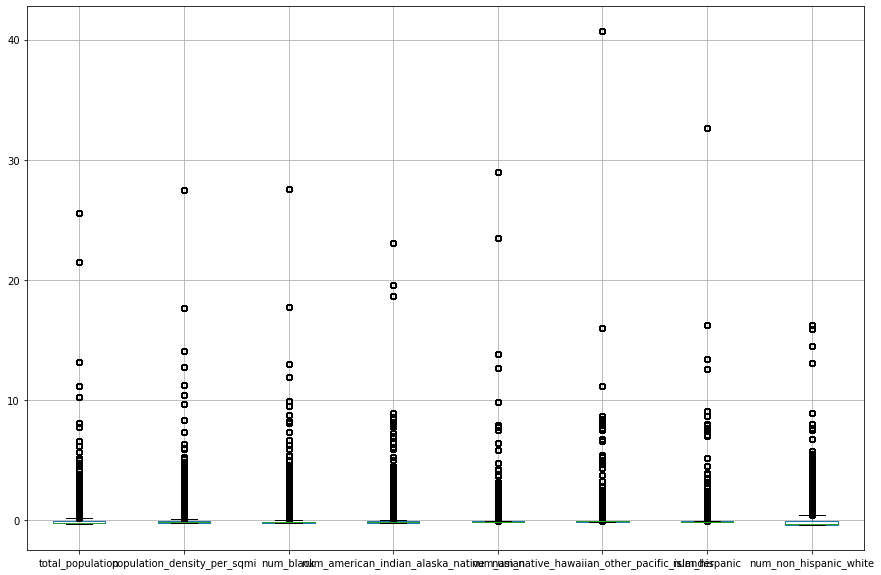

In [ ]:
X_TrainCase_zscore.boxplot(column =list(col_names[0:8]),figsize=(15,10))

<AxesSubplot:>

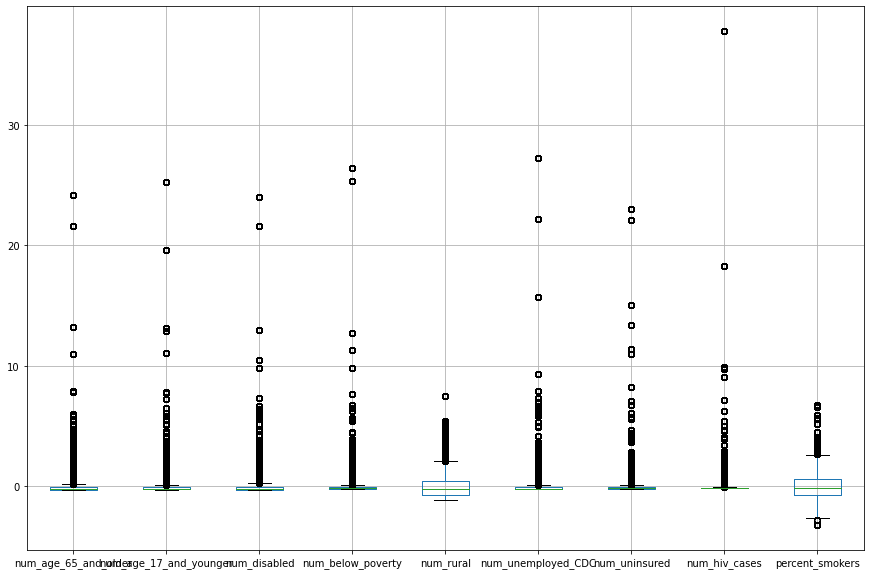

In [ ]:
X_TrainCase_zscore.boxplot(column =list(col_names[8:17]),figsize=(15,10))

<AxesSubplot:>

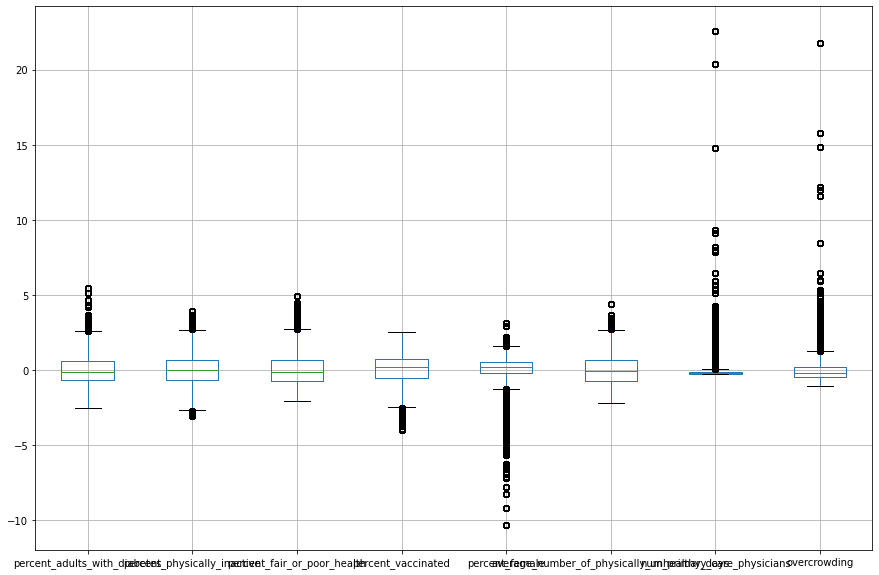

In [ ]:
X_TrainCase_zscore.boxplot(column =list(col_names[18:26]),figsize=(15,10))

<AxesSubplot:>

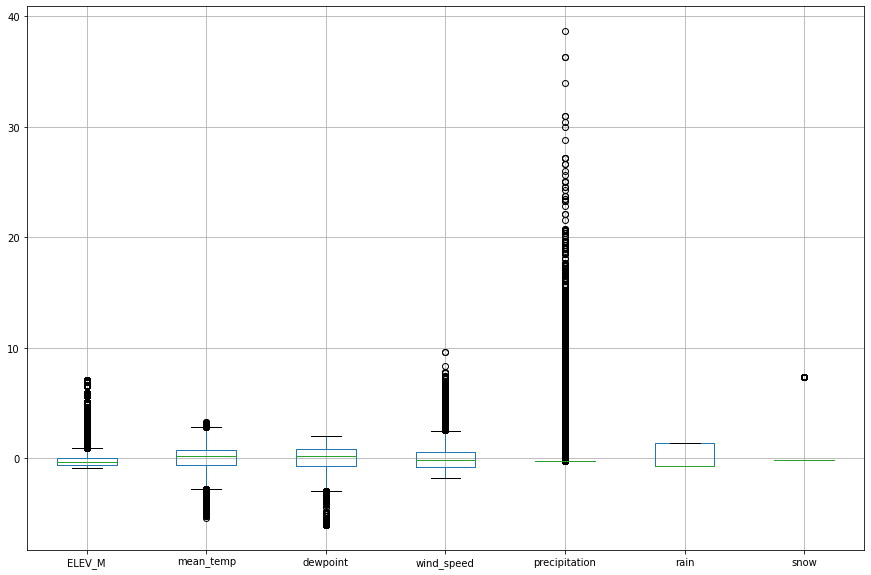

In [ ]:
X_TrainCase_zscore.boxplot(column =list(col_names[27:35]),figsize=(15,10))

In [ ]:
# Almost every feature has outliers :)
# Attempting the next step of Feature Engineering WITHOUT treating outliers i.e with original distribution

In [ ]:
#df3=df2.groupby(['county','state']).apply(lambda x: x['total_population'].median if x['total_population'].isnull else x['total_population'])

In [ ]:
#df2['new_pop'] = df2.groupby(['county'])['total_population'].transform(lambda grp: grp.fillna(np.median(grp))) 

In [ ]:
#df2['new_popu'] = df2.groupby(['county','state'])['total_population'].transform(lambda grp: grp.fillna(np.median(grp)))

In [ ]:
#df2['total_population'].fillna(df2.groupby(['county','state'])['total_population'].transform(lambda grp: grp.fillna(np.median(grp))),inplace=True)

In [ ]:
#df2['total_population'].fillna(df2.groupby(['county','state'])['total_population'].transform('median'))

In [ ]:
#df2['new_smokers'] = df2.groupby(['county','state'])['percent_smokers'].transform(lambda grp: grp.ffill(axis=0)) 

In [ ]:
#df2['total_population'] = df2.groupby(['county'])['total_population'].transform(lambda grp: grp.fillna(np.median(grp))) 

In [ ]:
#df2['total_population'].fillna(df2.groupby(['county'])['total_population'].transform(lambda grp: grp.fillna(np.median(grp))),inplace=True)

In [ ]:
#df2['total_population'] = df2['total_population'].groupby([df2['county'], df2['state']]).transform(lambda grp: grp.fillna(np.median(grp))) 

In [ ]:
#df3['num_primary_care_physicians'] = df3['num_primary_care_physicians'].groupby(df3['state']).transform(lambda grp: grp.fillna(np.median(grp)))
#df3['num_primary_care_physicians'] = df3['num_primary_care_physicians'].fillna(df3.groupby(['state'])['num_primary_care_physicians'].transform('median'))
# This worked

In [ ]:
#df3.iloc[[2024,2410],:]

In [ ]:
# Similarly, we'll have to replace other columns with NaN at county level with median of state values which that county belongs to

In [ ]:
#trns =df2.groupby(['county','state']).transform(lambda x: x.ffill()).unstack()

# Checking if any invalid string is present in the data
test_str = ['?','#','NA','na']
#tested ='?'
#mask = veh_df.applymap(lambda x:  tested in str(x))
mask = df1.applymap(lambda x: any([k in str(x) for k in test_str]))

mask.all()